In [15]:
import re
female_txt = "lfw_funneled\\female_names.txt"
male_txt = "lfw_funneled\\male_names.txt"
female_name = []
female_pic = []
female_path = []
male_name = []
male_pic = []
male_path = []
with open(female_txt, 'r') as fp:
    pic = fp.readline()
    while pic != "":
        female_pic.append(pic.strip('\n'))
        female_name.append(re.sub('_0....jpg\n', '', pic))
        pic = fp.readline()
with open(male_txt, 'r') as fp:
    pic = fp.readline()
    while pic != "":
        male_pic.append(pic.strip('\n'))
        male_name.append(re.sub('_0....jpg\n', '', pic))
        pic = fp.readline()
for i in range(0, len(male_name)):
    male_path.append('lfw_funneled\\'+ male_name[i] + '\\' + male_pic[i])
for i in range(0, len(female_name)):
    female_path.append('lfw_funneled\\'+ female_name[i] + '\\' + female_pic[i])
    
import random
def SplitData(path,train_set,test_set,split_size):
    train_length=int(len(path)*split_size)
    test_length=len(path)-train_length
    shuffled_set=random.sample(path,len(path))
    train_set.extend(shuffled_set[0:train_length])
    test_set.extend(shuffled_set[-test_length:])
    
male_train_set=[]
male_test_set=[]
female_train_set=[]
female_test_set=[]
SplitData(male_path,male_train_set,male_test_set,0.9)
SplitData(female_path,female_train_set,female_test_set,0.9)

male_train_labels=[1 for _ in range(0,len(male_train_set))]
female_train_labels=[0 for _ in range(0,len(female_train_set))]
male_test_labels=[1 for _ in range(0,len(male_test_set))]
female_test_labels=[0 for _ in range(0,len(female_test_set))]

train_set=male_train_set+female_train_set
train_labels=male_train_labels+female_train_labels
test_set=male_test_set+female_test_set
test_labels=male_test_labels+female_test_labels

test_combine=list(zip(test_set,test_labels))
random.shuffle(test_combine)
test_set,test_labels=zip(*test_combine)

train_combine=list(zip(train_set,train_labels))
random.shuffle(train_combine)
train_set,train_labels=zip(*train_combine)

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
# from time import sleep
# # i=16
# # img=cv2.imread(train_set[i])
# # plt.imshow(img)
# # print(train_labels[i])

In [17]:
detector=cv2.CascadeClassifier("C:\\Users\\admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
# img=cv2.imread(train_set[0])
# faces=detector.detectMultiScale(img)
# x,y,w,h=faces[0]
# detected_face=img[int(y):int(y+h),int(x):int(x+w)]
# detected_face=cv2.resize(detected_face,(50,50))
# plt.imshow(detected_face)
# print(type(detected_face))

In [18]:
train_images=[]
test_images=[]
for i in range(0,len(train_set)): 
    img=cv2.imread(train_set[i])
#     faces=detector.detectMultiScale(img)
#     if len(faces)>0:
#         x,y,w,h=faces[0]
#         detected_face=img[int(y):int(y+h),int(x):int(x+w)]
#         detected_face=cv2.resize(detected_face,(50,50))
#         detected_face=detected_face.mean(axis=2)
#         train_images.append(detected_face)
#     else:
    detected_face=cv2.resize(img,(50,50))
    detected_face=detected_face.mean(axis=2)
    train_images.append(detected_face)
for i in range(0,len(test_set)):
    img=cv2.imread(test_set[i])
#     faces=detector.detectMultiScale(img)
#     if len(faces)>0:
#         x,y,w,h=faces[0]
#         detected_face=img[int(y):int(y+h),int(x):int(x+w)]
#         detected_face=cv2.resize(detected_face,(50,50))
#         detected_face=detected_face.mean(axis=2)
#         test_images.append(detected_face)
#     else:
    detected_face=cv2.resize(img,(50,50))
    detected_face=detected_face.mean(axis=2)
    test_images.append(detected_face)

In [19]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(50,50,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                247872    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [20]:
# i=13
# plt.imshow(train_images[i])
# print(train_labels[i])
# print(len(train_images[i]))

In [21]:
train_images=np.array(train_images)
train_images_scaled=train_images/255
train_labels=np.array(train_labels)
# print(len(test_images_scaled))
# print(len(test_labels))

In [22]:
model.compile(optimizer=tf.optimizers.RMSprop(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(train_images_scaled.reshape(-1,50,50,1),train_labels,epochs=5)

Epoch 1/5
373/373 [==============================] - 11s 28ms/step - loss: 0.3788 - accuracy: 0.8270
Epoch 2/5
373/373 [==============================] - 11s 29ms/step - loss: 0.2660 - accuracy: 0.8893
Epoch 3/5
373/373 [==============================] - 11s 29ms/step - loss: 0.2079 - accuracy: 0.9179
Epoch 4/5
373/373 [==============================] - 11s 30ms/step - loss: 0.1695 - accuracy: 0.9322
Epoch 5/5
373/373 [==============================] - 11s 30ms/step - loss: 0.1417 - accuracy: 0.94670s - loss: 0.1404 - accuracy: 


In [23]:
test_images=np.array(test_images)
test_images_scaled=test_images/255
test_labels=np.array(test_labels)
model.evaluate(test_images_scaled.reshape(-1,50,50,1),test_labels)

42/42 [==============================] - 0s 6ms/step - loss: 0.2236 - accuracy: 0.9094


[0.22359997034072876, 0.9093655347824097]

In [24]:
# print(len(test_labels))
# for i in range(0,len(test_labels)):
#     print("Predict:",np.argmax(model.predict([[test_images_scaled[i].reshape(-1,50,50,1)]])),";","Data:",test_labels[i])
#     img=cv2.imread(test_set[i])
#     plt.imshow(img)   
#     a=input("")
#     if a==' ':
#         break

In [25]:
def Catch_Face_And_Predict(imgpath): # 先捕捉脸再预测，捕捉脸时准确性低。
    img=cv2.imread(imgpath)
    plt.imshow(img)
    faces=detector.detectMultiScale(img)
    if len(faces)>0:
        x,y,w,h=faces[0]
        detected_face=img[int(y):int(y+h),int(x):int(x+w)]
        detected_face=cv2.resize(detected_face,(50,50))
        detected_face=detected_face.mean(axis=2)
    else:
        detected_face=cv2.resize(img,(50,50))
        detected_face=detected_face.mean(axis=2)
    detected_face=np.array(detected_face)/255
    _=model.predict([[detected_face.reshape(-1,50,50,1)]])
    print("Predict:")
    if np.argmax(_)==0:
        print("female")
    else:
        print("male")
        
def Direct_Predict(imgpath): # 直接预测，准确性高。
    img=cv2.imread(imgpath)
    plt.imshow(img)
    img=cv2.resize(img,(50,50))
    img=img.mean(axis=2)
    img=np.array(img)/255
    _=model.predict([[img.reshape(-1,50,50,1)]])
    print("Predict:")
    if np.argmax(_)==0:
        print("female")
    else:
        print("male")

Predict:
male


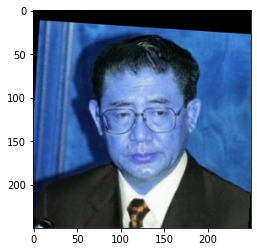

In [26]:
Direct_Predict("1.jpg")

Predict:
female


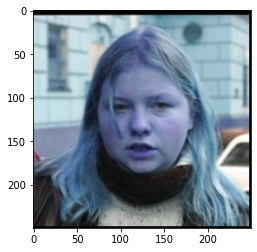

In [27]:
Direct_Predict("2.jpg")

In [30]:
model.save("gender_recognition_model.h5")

42/42 [==============================] - 0s 6ms/step - loss: 0.2236 - accuracy: 0.9094


[0.22359997034072876, 0.9093655347824097]